In [1]:
#Getting data ready
#Import all tools we need

#Regular EDA ( Exploratory Data Analysis )
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to be availble inside notebook
%matplotlib inline 

#Models from Scikit Learn
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import  RandomForestRegressor, ExtraTreesRegressor,GradientBoostingRegressor, BaggingRegressor,HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, Ridge, LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



#Model evaulation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_log_error,r2_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Setup random seed
import numpy as np
np.random.seed(42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Import Training Data**

In [2]:
df= pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv",
                low_memory=False)

## **EDA**

In [3]:
#Check top 5 data
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
#Shape of the data
df.shape

(300153, 12)

In [5]:
# Removing Useless column
df = df.drop("Unnamed: 0", axis =1)

In [6]:
# Correlation of the data
df.corr().T

/tmp/ipykernel_32/2851215252.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [9]:
#Checking number of NULL values
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## We can make some charts to showcase

In [10]:
df1 = df.groupby(['flight','airline'], as_index = False)
df1.airline.value_counts()

,flight,airline,count
0,6E-102,Indigo,39
1,6E-105,Indigo,5
2,6E-113,Indigo,49
3,6E-121,Indigo,20
4,6E-123,Indigo,5
...,...,...,...
1556,UK-988,Vistara,1381
1557,UK-993,Vistara,911
1558,UK-994,Vistara,1273
1559,UK-995,Vistara,1024


In [11]:
df2 = df.groupby(['flight', 'airline','class'], as_index = False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

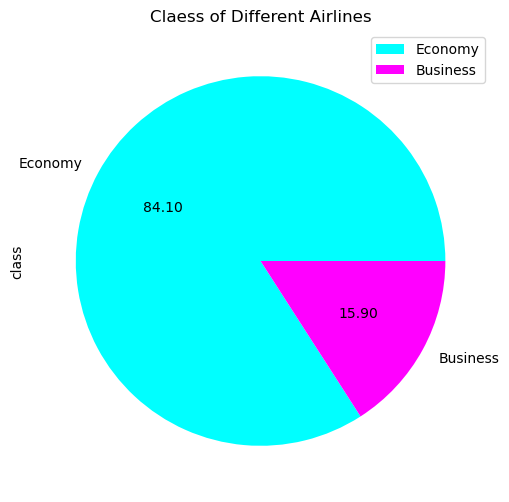

In [12]:
plt.figure(figsize =(8,6))
df2["class"].value_counts().plot(kind ='pie', textprops ={'color':'black'}, cmap='cool', autopct ='%.2f')
plt.legend(['Economy','Business'])
plt.title("Claess of Different Airlines")
plt.show()

## **Does Price vary with Airlines**

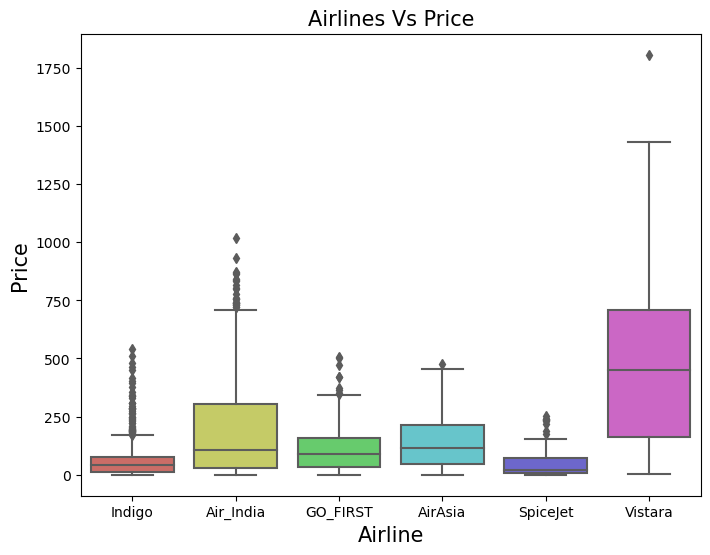

In [13]:
plt.figure(figsize =(8,6))
sns.boxplot(x=df2['airline'], y= df2['price'],palette='hls')
plt.title("Airlines Vs Price", fontsize=15)
plt.xlabel("Airline", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How does ticket price vary with Class**

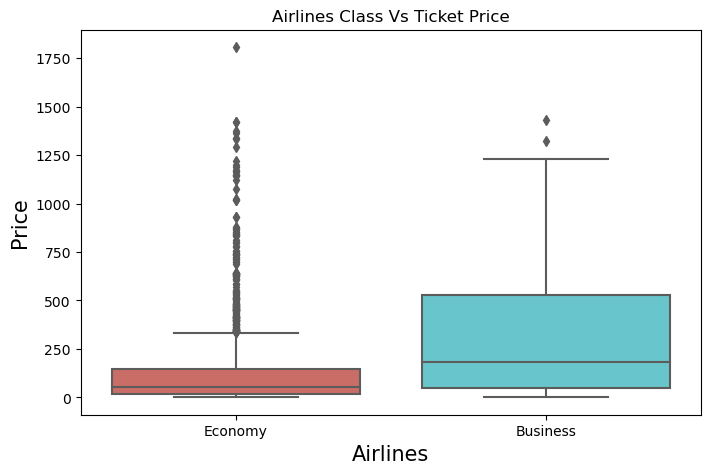

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df2['class'], y=df2['price'], palette='hls')
plt.title("Airlines Class Vs Ticket Price")
plt.xlabel("Airlines", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How does the price varies with number of stops??**

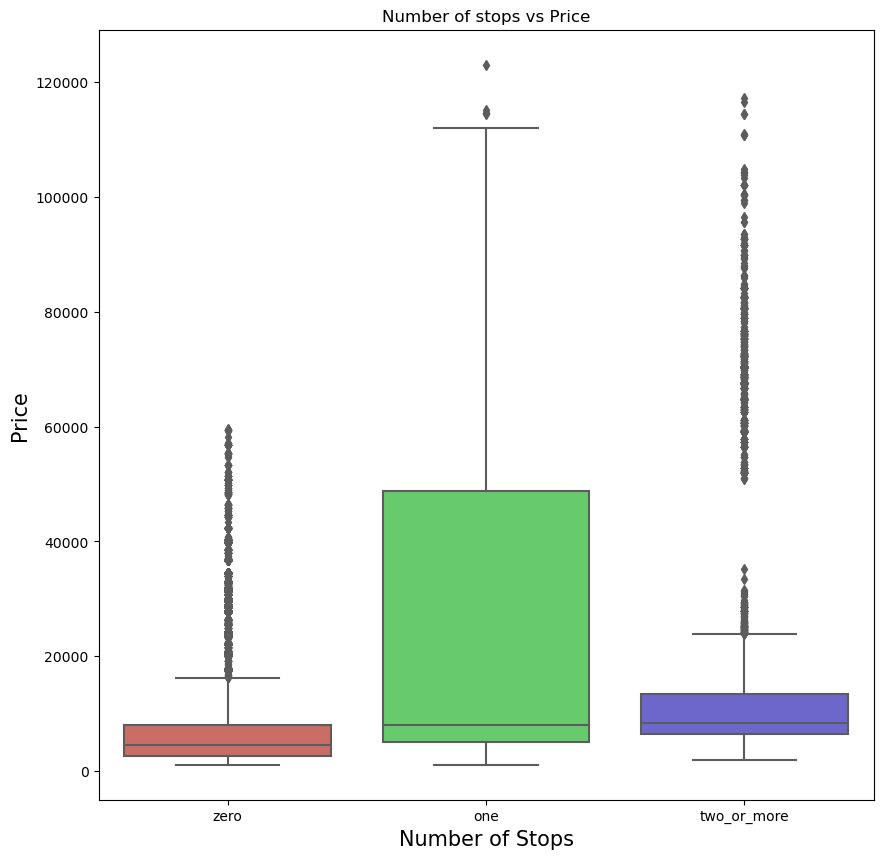

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x=df['stops'], y=df['price'],palette='hls')
plt.title("Number of stops vs Price")
plt.xlabel("Number of Stops", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How ticket price varies with Departure time and arrival time??**

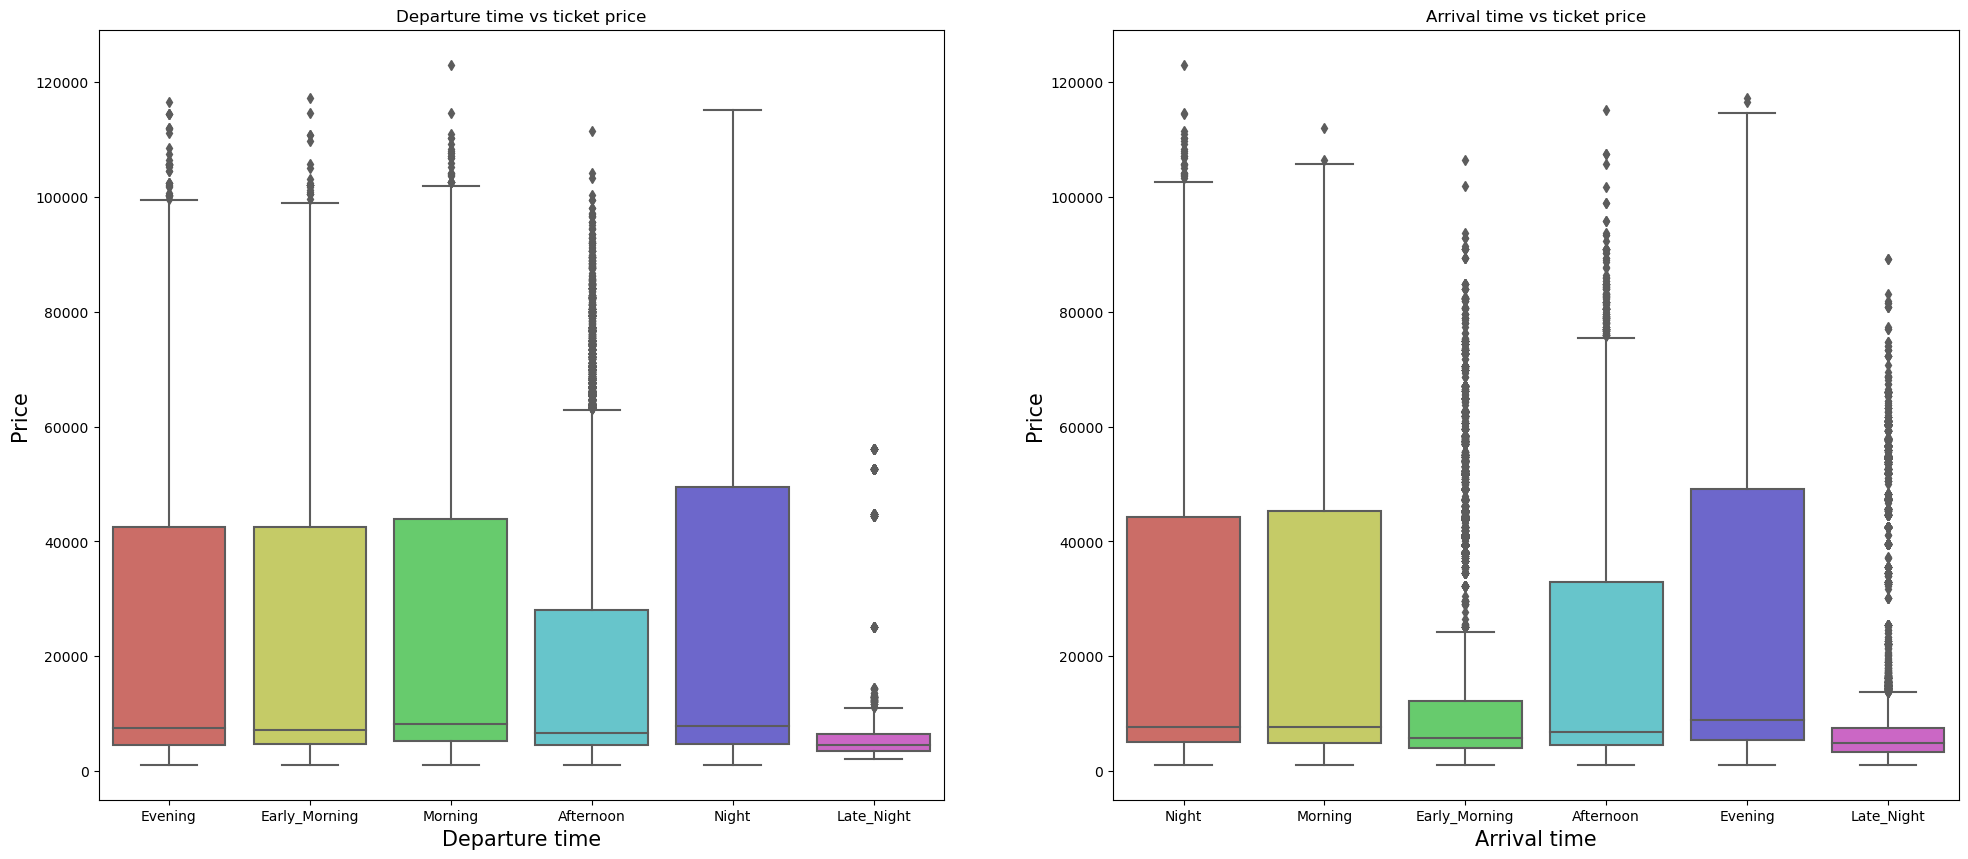

In [16]:
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time', y='price', data=df, palette='hls')
plt.title("Departure time vs ticket price")
plt.xlabel("Departure time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time', y='price', data=df, palette='hls')
plt.title("Arrival time vs ticket price")
plt.xlabel("Arrival time", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How ticket price varies based on Source City and Destination City??**


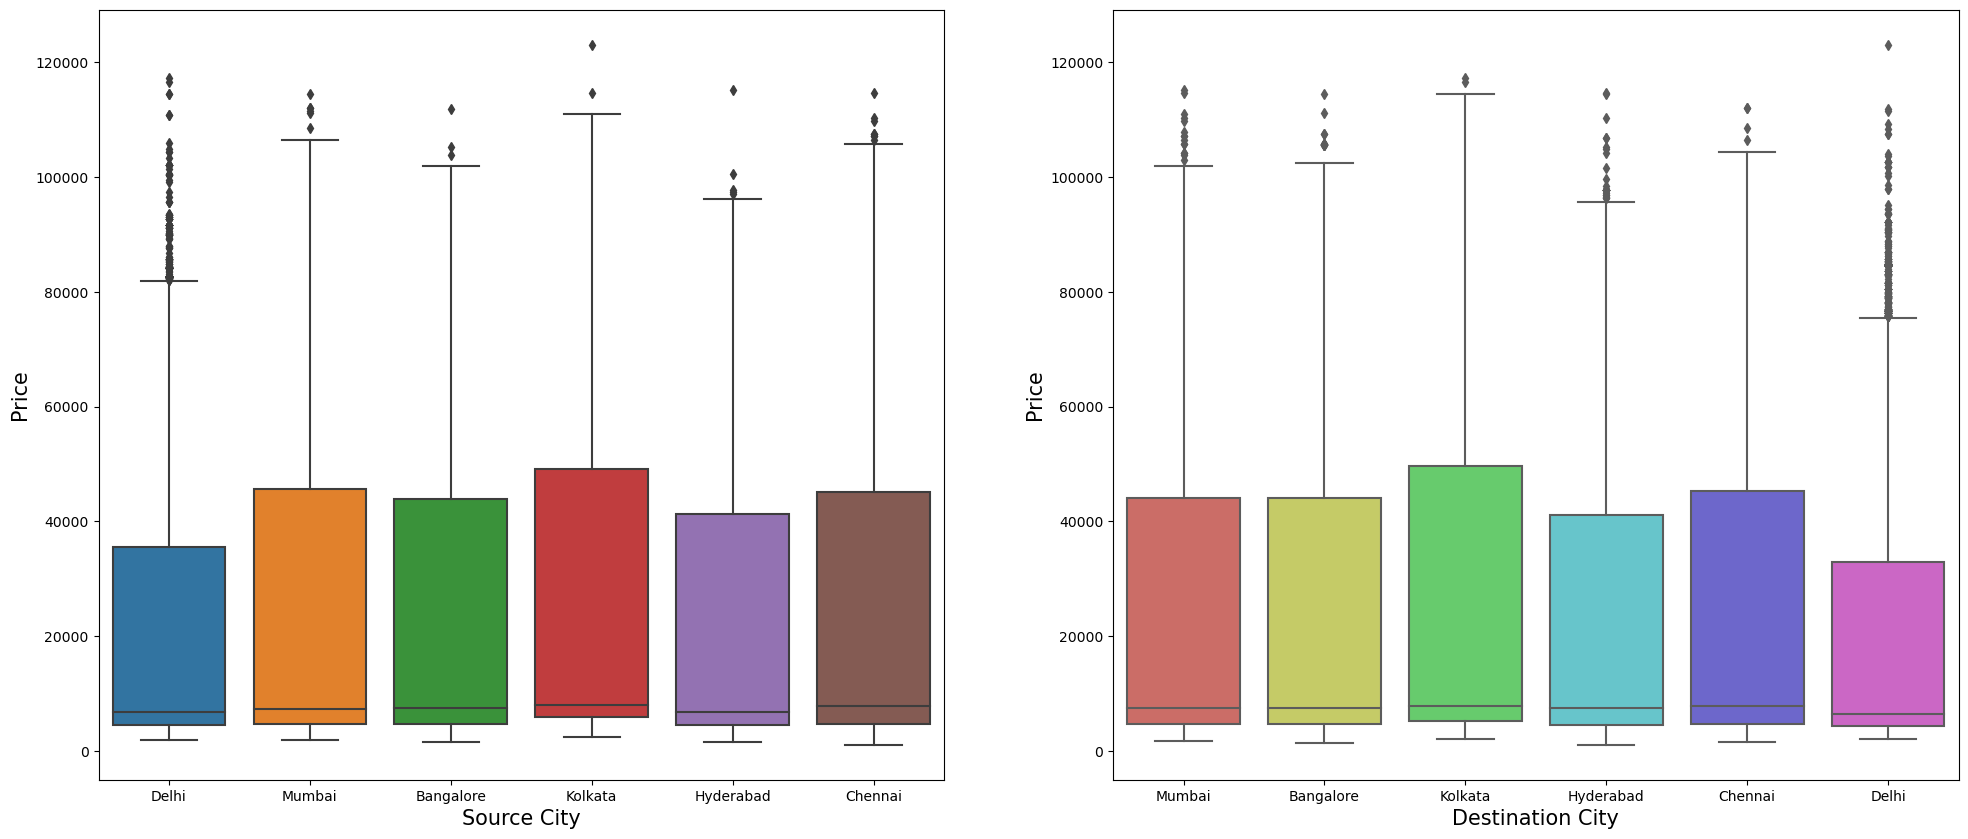

In [17]:
plt.figure(figsize =(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city', y='price', data = df)
plt.xlabel("Source City", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city', y='price', data=df, palette='hls')
plt.ylabel("Price", fontsize=15)
plt.xlabel("Destination City", fontsize =15)
plt.show()

## **How price varies with Flight Duration based on class??**

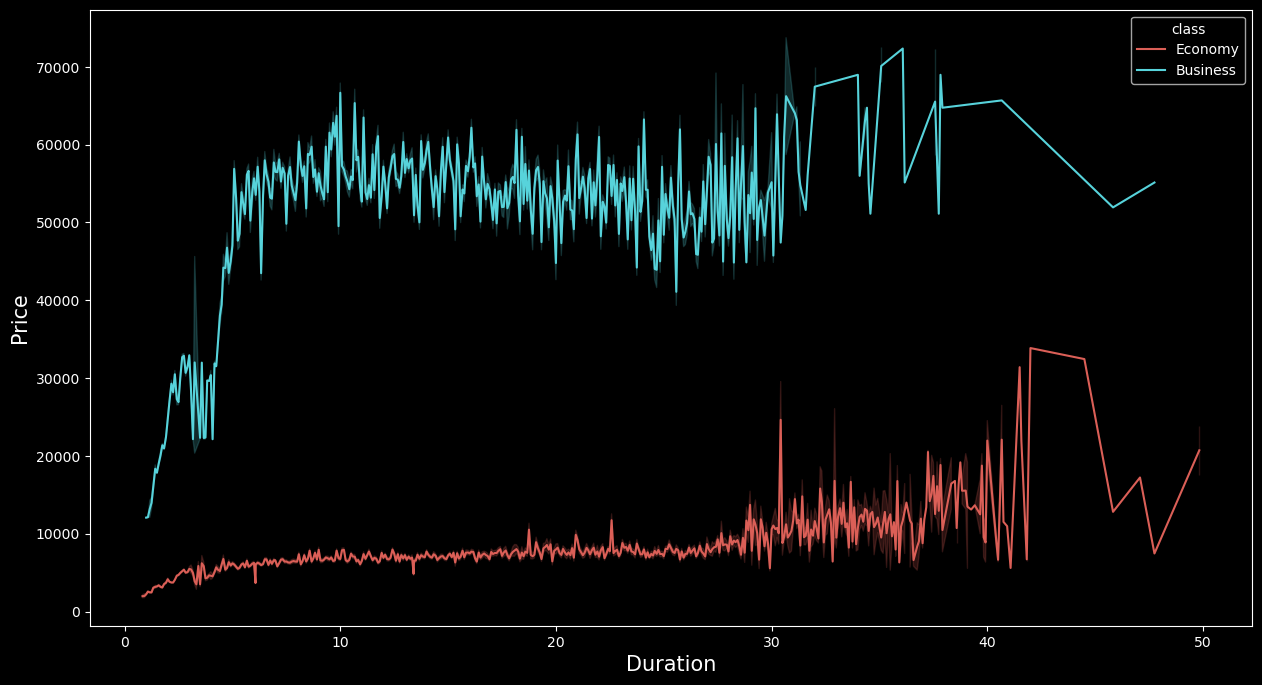

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='duration', y='price', hue='class', palette='hls')
plt.xlabel("Duration", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.show()

## **How the price affects with the number of days left??**

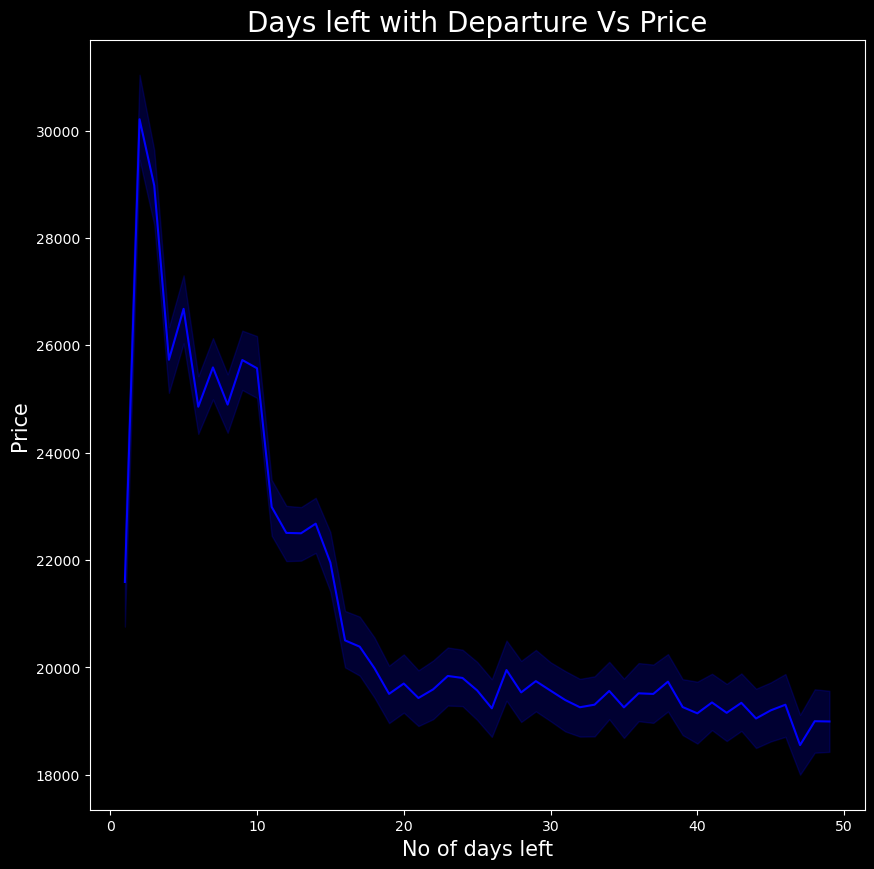

In [19]:
plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='days_left', y='price', color='blue')
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

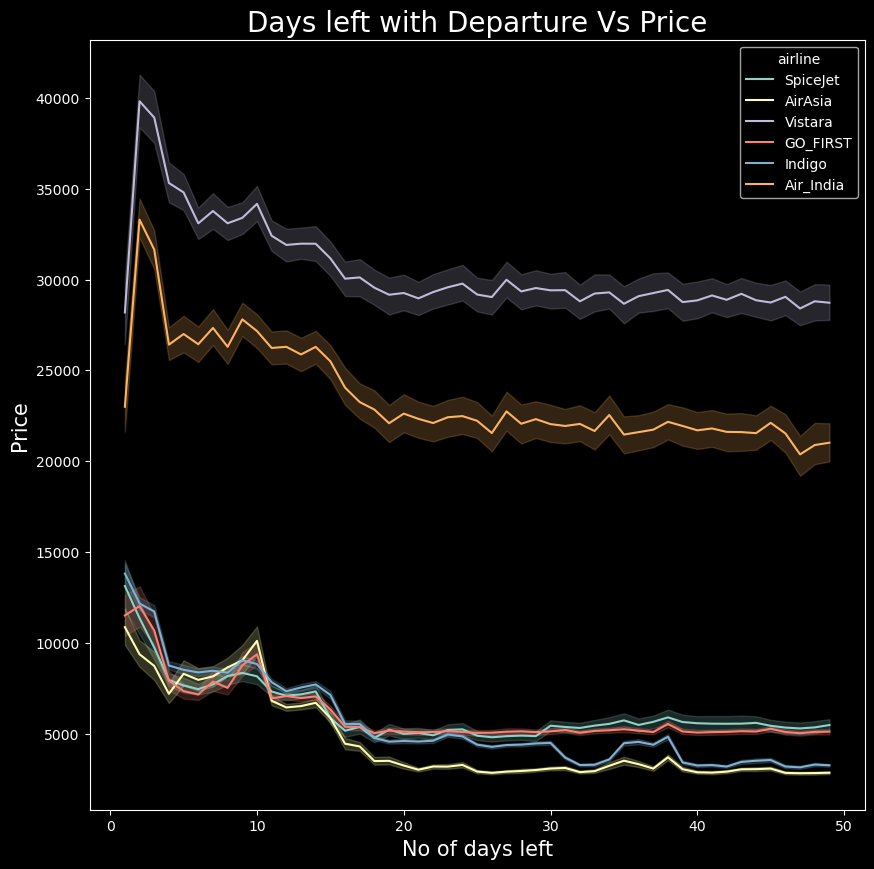

In [20]:
plt.figure(figsize=(10,10))
plt.xlabel("No of days left", fontsize=15)
plt.ylabel("Price", fontsize=15)
sns.lineplot(data=df, x='days_left', y='price', hue='airline',color='blue')
plt.title("Days left with Departure Vs Price", fontsize=20)
plt.show()

## **Total number of flights from one city to another**

In [21]:
df.groupby(['flight', 'source_city', 'destination_city','price', 'class'], 
           as_index=False).count().groupby(['source_city', 'destination_city'] , as_index=False)["flight"].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,826
1,Bangalore,Delhi,1771
2,Bangalore,Hyderabad,1035
3,Bangalore,Kolkata,1637
4,Bangalore,Mumbai,1676
5,Chennai,Bangalore,792
6,Chennai,Delhi,1175
7,Chennai,Hyderabad,816
8,Chennai,Kolkata,1429
9,Chennai,Mumbai,1412


## **Average Price of different Airlines from Source City to destination City**

In [22]:
df.groupby(['airline', 'source_city', 'destination_city','price'], 
           as_index=False)["price"].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,1603.0
1,AirAsia,Bangalore,Chennai,1715.0
2,AirAsia,Bangalore,Chennai,1822.0
3,AirAsia,Bangalore,Chennai,1925.0
4,AirAsia,Bangalore,Chennai,3499.0
5,AirAsia,Bangalore,Chennai,3919.0
6,AirAsia,Bangalore,Chennai,4285.0
7,AirAsia,Bangalore,Delhi,2723.0
8,AirAsia,Bangalore,Delhi,3467.0
9,AirAsia,Bangalore,Delhi,4072.0


### **Modifying columns into numbers**


In [24]:
le= LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col] = le.fit_transform(df[col])

In [25]:
# Splitting the data
X = df.drop('price',axis =1)
y= df['price']
# Splitting data in Train and test dataset.
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240122, 10), (60031, 10), (240122,), (60031,))

In [26]:
#Convert int values to machine learning languages
mmscaler=MinMaxScaler(feature_range =(0,1))
X_train = mmscaler.fit_transform(X_train)
X_test = mmscaler.fit_transform(X_test)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [27]:
# Creating a dictionary to store modelwise results
Results = pd.DataFrame()

In [28]:
#Creating a function to calculate Mean Absolute Percentage Error(MAPE)
def MAPE(y_test, y_pred):
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test-y_pred)/y_pred))*100

In [29]:
#Creating a function to calculate different statstical numbers:
def Result_Stat(X_train, y_train,X_test, y_test,models):

   #Predict model with test data.
   y_pred = models.predict(X_test)
   #Print model name
   print("Model Name: ",models)
   print("Mean Absolute Error_MAE: ",round(mean_absolute_error(y_test, y_pred),3))
   print("Mean Squared Error_MSE: ",round(mean_squared_error(y_test, y_pred),3))
   print("Root Mean Squared Error_RMSE: ",round(np.sqrt(mean_absolute_error(y_test, y_pred)),3))
   print("R2_Score: ",round(r2_score(y_test, y_pred),3))
   print("Root Mean Squared Log Error (RMSLE): ",round(np.log(np.sqrt(mean_absolute_error(y_test, y_pred))),3))
   result = MAPE(y_test,y_pred)
   print("Mean Absolute Error Percentage: ", round(result,2),'%')
   r_squared = round(r2_score(y_test,y_pred),2)
   adjusted_r_square = round(1-(1-r_squared) * (len(y)-1)/ (len(y)-X.shape[1]-1),2)
   print("------------------------------------------------------------------------")
   new_row ={
       "Model Name":models,
       'Mean_Absolute_Error_MAE': mean_absolute_error(y_test, y_pred),
       'Mean_Squared_Error_MSE':mean_squared_error(y_test, y_pred),
       "Root_Mean_Squared_Error_RMSE":np.sqrt(mean_absolute_error(y_test, y_pred)),
       "Adj_R_Square":adjusted_r_square,
       "Root_Mean_Squared_Error_Percentage_MAPE":result,
       "Root_Mean_Squared_Log_Error_RMSLE":np.log(np.sqrt(mean_absolute_error(y_test, y_pred))),
       "R2_Score": r_squared
       }
   return new_row

## **Creating object of different regression models**

In [30]:
modelmlg = LinearRegression()
print("Linear regression model fitting")
modelmlg.fit(X_train,y_train)
print("Linear Regression Model Test Result\n")
Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelmlg), ignore_index=True)

modeldcr = DecisionTreeRegressor()
print("Decision Tree Regression model fitting")
modeldcr.fit(X_train, y_train)
Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modeldcr), ignore_index=True)


modelbag = BaggingRegressor()

print("Bagging Boosting Regressor Model Training")
modelbag.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelbag)
Results = Results.append(result, ignore_index=True)


modelrfr = RandomForestRegressor()
print("Random Forest Regressor Model Training")
modelrfr.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelrfr)
Results = Results.append(result, ignore_index=True)


modelXGR = xgb.XGBRegressor()
print("XGB Regressor Model Training")
modelXGR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelXGR)
Results = Results.append(result, ignore_index=True)

modelKNN = KNeighborsRegressor(n_neighbors=5)
print("K Neighbour Regressor Model Training")
modelKNN.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelKNN)
Results = Results.append(result, ignore_index=True)

modelETR  = ExtraTreesRegressor()
print("Extra Tree Regressor Model Training")
modelETR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelETR)
Results = Results.append(result, ignore_index=True)

modelRE = Ridge()
print("Ridge Model Training")
modelRE.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelRE)
Results = Results.append(result, ignore_index=True)

modelHGB = HistGradientBoostingRegressor()
print("HGB Regressor Model Training")
modelHGB.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelHGB)
Results = Results.append(result, ignore_index=True)


modelLO = linear_model.Lasso(alpha = 0.1)
print("Lasso Model Training")
modelLO.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelLO)
Results = Results.append(result, ignore_index=True)

modelGBR = GradientBoostingRegressor(loss='squared_error', random_state = 42,learning_rate=0.1, n_estimators=100,criterion='friedman_mse',
                                     min_samples_split=2, min_samples_leaf=1,min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, 
                                     init=None,  max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, 
                                     warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)


print("Gradient Boosting Regressor model Training")
modelGBR.fit(X_train, y_train)
result = Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelGBR)
Results = Results.append(result, ignore_index=True)

Linear regression model fitting
Linear Regression Model Test Result

Model Name:  LinearRegression()
Mean Absolute Error_MAE:  4628.895
Mean Squared Error_MSE:  49195805.514
Root Mean Squared Error_RMSE:  68.036
R2_Score:  0.905
Root Mean Squared Log Error (RMSLE):  4.22
Mean Absolute Error Percentage:  164.03 %
------------------------------------------------------------------------


/tmp/ipykernel_32/2060695427.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modelmlg), ignore_index=True)


Decision Tree Regression model fitting
Model Name:  DecisionTreeRegressor()
Mean Absolute Error_MAE:  1206.144
Mean Squared Error_MSE:  12709292.241
Root Mean Squared Error_RMSE:  34.73
R2_Score:  0.975
Root Mean Squared Log Error (RMSLE):  3.548
Mean Absolute Error Percentage:  7.88 %
------------------------------------------------------------------------
Bagging Boosting Regressor Model Training


/tmp/ipykernel_32/2060695427.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(Result_Stat(X_train = X_train, y_train = y_train, X_test=X_test,y_test=y_test, models = modeldcr), ignore_index=True)


Model Name:  BaggingRegressor()
Mean Absolute Error_MAE:  1171.672
Mean Squared Error_MSE:  8623499.71
Root Mean Squared Error_RMSE:  34.23
R2_Score:  0.983
Root Mean Squared Log Error (RMSLE):  3.533
Mean Absolute Error Percentage:  7.51 %
------------------------------------------------------------------------
Random Forest Regressor Model Training


/tmp/ipykernel_32/2060695427.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  RandomForestRegressor()
Mean Absolute Error_MAE:  1143.342
Mean Squared Error_MSE:  8070666.645
Root Mean Squared Error_RMSE:  33.813
R2_Score:  0.984
Root Mean Squared Log Error (RMSLE):  3.521
Mean Absolute Error Percentage:  7.32 %
------------------------------------------------------------------------
XGB Regressor Model Training


/tmp/ipykernel_32/2060695427.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Mean Absolute Error_MAE:  1858.958
Mean Squared Error_MSE:  11543757.038
Root Mean Squared Error_RMSE:  43.116
R2_Score:  0.978
Root Mean Squared Log Error (RMSLE):  3.764
Mean Absolute Error Percentage:  13.54 %
---------------------------------

/tmp/ipykernel_32/2060695427.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  KNeighborsRegressor()
Mean Absolute Error_MAE:  1826.513
Mean Squared Error_MSE:  14332489.952
Root Mean Squared Error_RMSE:  42.738
R2_Score:  0.972
Root Mean Squared Log Error (RMSLE):  3.755
Mean Absolute Error Percentage:  10.62 %
------------------------------------------------------------------------
Extra Tree Regressor Model Training


/tmp/ipykernel_32/2060695427.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  ExtraTreesRegressor()
Mean Absolute Error_MAE:  1116.045
Mean Squared Error_MSE:  7615468.304
Root Mean Squared Error_RMSE:  33.407
R2_Score:  0.985
Root Mean Squared Log Error (RMSLE):  3.509
Mean Absolute Error Percentage:  7.15 %
------------------------------------------------------------------------
Ridge Model Training
Model Name:  Ridge()
Mean Absolute Error_MAE:  4628.911
Mean Squared Error_MSE:  49195779.3
Root Mean Squared Error_RMSE:  68.036
R2_Score:  0.905
Root Mean Squared Log Error (RMSLE):  4.22
Mean Absolute Error Percentage:  327.13 %
------------------------------------------------------------------------
HGB Regressor Model Training


/tmp/ipykernel_32/2060695427.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)
/tmp/ipykernel_32/2060695427.py:50: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  HistGradientBoostingRegressor()
Mean Absolute Error_MAE:  2100.096
Mean Squared Error_MSE:  13385229.518
Root Mean Squared Error_RMSE:  45.827
R2_Score:  0.974
Root Mean Squared Log Error (RMSLE):  3.825
Mean Absolute Error Percentage:  15.68 %
------------------------------------------------------------------------
Lasso Model Training
Model Name:  Lasso(alpha=0.1)
Mean Absolute Error_MAE:  4628.783
Mean Squared Error_MSE:  49195743.196
Root Mean Squared Error_RMSE:  68.035
R2_Score:  0.905
Root Mean Squared Log Error (RMSLE):  4.22
Mean Absolute Error Percentage:  176.03 %
------------------------------------------------------------------------
Gradient Boosting Regressor model Training


/tmp/ipykernel_32/2060695427.py:56: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)
/tmp/ipykernel_32/2060695427.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


Model Name:  GradientBoostingRegressor(random_state=42)
Mean Absolute Error_MAE:  2834.582
Mean Squared Error_MSE:  22605369.195
Root Mean Squared Error_RMSE:  53.241
R2_Score:  0.956
Root Mean Squared Log Error (RMSLE):  3.975
Mean Absolute Error Percentage:  19.13 %
------------------------------------------------------------------------


/tmp/ipykernel_32/2060695427.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Results = Results.append(result, ignore_index=True)


## **Showing Final Results**

In [31]:
Results.sort_values(by = 'R2_Score', ascending=False)

,Model Name,Mean_Absolute_Error_MAE,Mean_Squared_Error_MSE,Root_Mean_Squared_Error_RMSE,Adj_R_Square,Root_Mean_Squared_Error_Percentage_MAPE,Root_Mean_Squared_Log_Error_RMSLE,R2_Score
6,"(ExtraTreeRegressor(random_state=1402481934), ...",1116.044514,7.615468e+06,33.407252,0.99,7.148703,3.508773,0.99
1,DecisionTreeRegressor(),1206.143679,1.270929e+07,34.729579,0.98,7.879088,3.547592,0.98
2,(DecisionTreeRegressor(random_state=1761383086...,1171.672119,8.623500e+06,34.229696,0.98,7.512821,3.533094,0.98
3,"(DecisionTreeRegressor(max_features=1.0, rando...",1143.341905,8.070667e+06,33.813339,0.98,7.324024,3.520855,0.98
4,"XGBRegressor(base_score=None, booster=None, ca...",1858.957844,1.154376e+07,43.115633,0.98,13.544320,3.763886,0.98
5,KNeighborsRegressor(),1826.513308,1.433249e+07,42.737727,0.97,10.617750,3.755082,0.97
8,HistGradientBoostingRegressor(),2100.096156,1.338523e+07,45.826806,0.97,15.676173,3.824869,0.97
10,([DecisionTreeRegressor(criterion='friedman_ms...,2834.582130,2.260537e+07,53.240794,0.96,19.133177,3.974825,0.96
0,LinearRegression(),4628.895291,4.919581e+07,68.035985,0.90,164.028555,4.220037,0.90
7,Ridge(),4628.910847,4.919578e+07,68.036100,0.90,327.134749,4.220038,0.90


## Extra Tree Regressor model is having R2 score of 98% which is the highest, hence fitting the training data with Extra Tree Regressor

In [32]:
modelETR.fit(X_train, y_train)
y_pred = modelETR.predict(X_test)
out = pd.DataFrame({"Price Actual":y_test, "Predicted Price":y_pred})
out

,Price Actual,Predicted Price
27131,7366,7166.52
266857,64831,77231.15
141228,6195,6233.10
288329,60160,58681.60
97334,6578,6569.60
...,...,...
5234,5026,5304.14
5591,3001,2876.75
168314,6734,7047.80
175191,5082,3755.77


## **Adding the prediction with a copied dataframe**

In [33]:
df_bk = df.copy()
result = df_bk.merge(out, left_index = True,right_index=True)
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price Actual,Predicted Price
105624,5,1528,0,1,1,4,4,1,24.67,22,6956,6956,7327.33
132090,2,1108,4,0,2,0,5,1,2.83,30,4499,4499,4783.75
104552,3,349,0,4,0,2,4,1,10.67,15,8118,8118,8662.84
42216,2,1087,2,0,0,5,1,1,8.83,44,4896,4896,4829.55
8031,5,1523,2,2,0,4,5,1,16.33,40,5227,5227,5217.02
212047,1,746,2,5,2,3,0,0,2.92,3,33979,33979,33657.22
45208,4,1388,5,2,2,5,2,1,2.42,14,5943,5943,6289.03
237615,1,788,5,2,0,4,4,0,12.67,45,36980,36980,37463.78
282334,5,1485,3,4,0,5,0,0,10.08,38,56702,56702,56887.82
283357,5,1508,3,1,0,4,4,0,26.75,10,51819,51819,51700.26


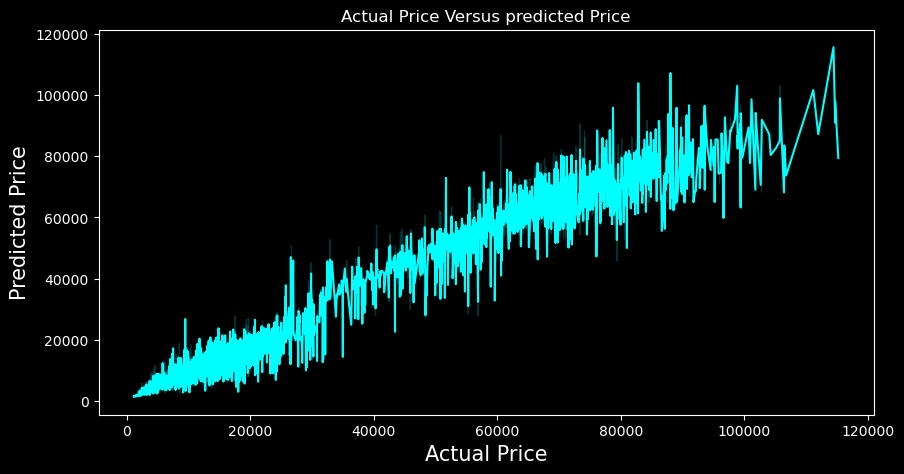

In [34]:
plt.figure(figsize = (10,5))
sns.lineplot(x='Price Actual', y='Predicted Price' ,data=result,color='cyan')
plt.title("Actual Price Versus predicted Price")
plt.xlabel("Actual Price", fontsize=15)
plt.ylabel("Predicted Price", fontsize=15)
plt.show()

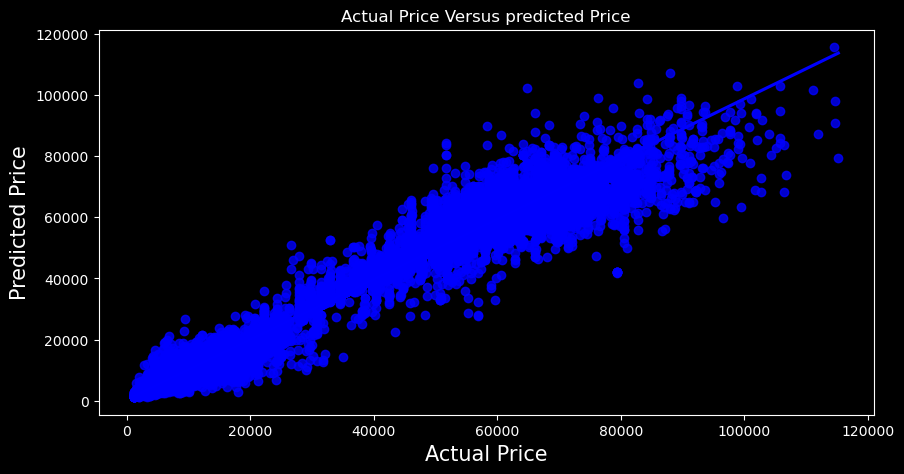

In [35]:
plt.figure(figsize = (10,5))
sns.regplot(x='Price Actual', y='Predicted Price' ,data=result,color='Blue')
plt.title("Actual Price Versus predicted Price")
plt.xlabel("Actual Price", fontsize=15)
plt.ylabel("Predicted Price", fontsize=15)
plt.show()